In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

In [2]:
iris_file = "data/iris.csv"
iris_df = pd.read_csv(iris_file)
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris_df.groupby("species").size() # each species is equally distributed

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [4]:
iris_df.dtypes # checking column types

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

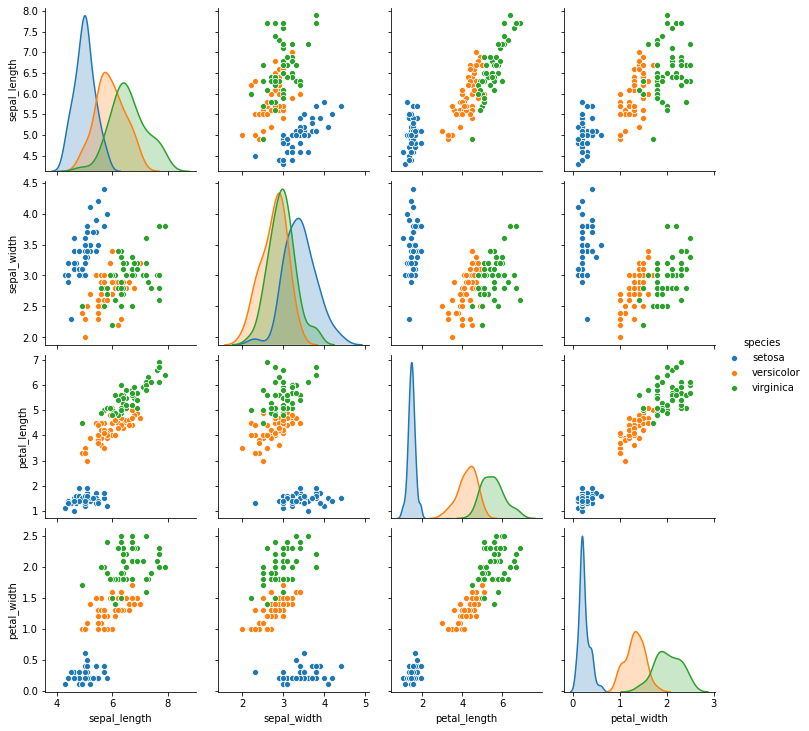

In [5]:
sns.pairplot(iris_df, hue="species")
plt.show()

In [6]:
# split the df into the classification data X and the prediction y
X = iris_df.iloc[:,0:4]
y = iris_df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

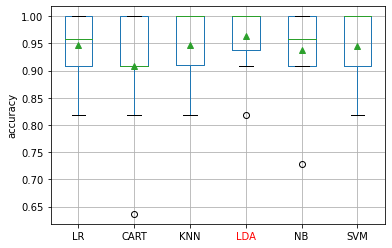

In [53]:
# check which model performs the best in this case
model_dict = {
    "LR" : LogisticRegression(solver='liblinear'), # For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
    "CART" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "LDA" : LinearDiscriminantAnalysis(),
    "NB" : GaussianNB(),
    "SVM" : SVC()
}
cvs_dict = {}
for name, model in model_dict.items():
    cvs = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    cvs_dict[name] = cvs
cvs_model_df = pd.DataFrame.from_dict(cvs_dict)
top_model = cvs_model_df.mean().idxmax()
fig, ax = plt.subplots()
cvs_model_df.boxplot(showmeans=True, ax=ax)
ax.set_ylabel("accuracy")
ax.get_xticklabels()[cvs_model_df.columns.get_loc(top_model)].set_color("red") # marks top scoring model red
plt.show()

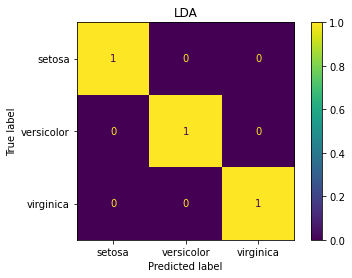

In [54]:
# makes prediction of top model and plots confusion matrix
model = model_dict[top_model]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.title(top_model)
plt.show()